Dataset Information:
Column Description
unique_id A unique identifier or key for each record in the 
dataset

date_time_of_pickup The time when the ride started

longitude_of_pickup Longitude of the taxi ride pickup point

latitude_of_pickup Latitude of the taxi ride pickup point

longitude__of_dropoff Longitude of the taxi ride dropoff point

latitude_of_dropoff Latitude of the taxi ride dropoff point

no_of_passenger count of the passengers during the ride

amount (target variable)dollar amount of the cost of the taxi 
ride

1. Importing Librabries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

2. 2. Reading and loading data:

In [ ]:
df = pd.read_csv("/content/taxi_fare.csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


3. EDA :

In [ ]:
df.shape

(50000, 8)

insights:

50000 cab booking details were gathered as a sample from the population, and each booking was represented by 8 traits.

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


insights:

Our dataset has 8 features, 7 of which are independant featuers and 1 of which is dependant.

independent features: unique_id , date_time_of_pickup,longitude_of_pickup, latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff, no_of_passenger.

Dependant feature : amount

among all features only date_time_of_pickup is need to covert. since it is a object data.



In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


Insights:

The average taxi fare amount is $11 Dollers.

There are few datapoints contain negative fare amounts, This could be outliers.

Latitude and longitude coordinates do not reveal any more information. But we can say that it contains very few outliers.

The maximum Pickup longitude is 40.783472 & minimum longitude is -75.423848.

The maximum Pickup latitude is401.083332 & minimum longitude is -74.006893.

The maximum Dropoff latitude is 43.415190 & minimum longitude is -84.654241.

There are few datapoints with zero passenger count.We occasionally utilize taxi to transport goods, so we can't claim with certainty that these are outliers. However, we may examine whether or not the test datapoints have no passengers.










In [ ]:
df.describe(include=np.object) # statistic about categorical data features in dataset.

<ipython-input-107-779cebbdad30>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object) # statistic about categorical data features in dataset.


,unique_id,date_time_of_pickup
count,50000,50000
unique,3597,49555
top,26:00.0,2011-09-03 01:30:00 UTC
freq,457,3


insights:

unique_id and date_time_of_pick features will identify unique datapoint in the dataset. however, the frequency count is 457 for unique_id and 3 for date_time_of_pickup.

In [ ]:
#Converting date_time_of_pickup from object type to TimpeStamp type
df["date_time_of_pickup"]= pd.to_datetime(df["date_time_of_pickup"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

insights:

We can see that there is zero missing value in the dataset.

4. Data investigation

In [ ]:
# The geographic coordinate is rounded to the 4 decimal place.
df.longitude_of_pickup  = round(df.longitude_of_pickup.astype(float),4)
df.latitude_of_pickup   = round(df.latitude_of_pickup.astype(float),4)
df.longitude_of_dropoff = round(df.longitude_of_dropoff.astype(float),4)
df.latitude_of_dropoff  = round(df.	latitude_of_dropoff.astype(float),4)
df.sample()


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
16875,08:16.0,16.5,2012-02-18 01:08:16+00:00,0.0,0.0,0.0,0.0,1


In [ ]:
# we will extract time feature from the "date_time_of_pickup"
# we will add a variable which measures the distance between pickup and drop
df= df.assign(hour = df.date_time_of_pickup.dt.hour,
              day= df.date_time_of_pickup.dt.day,
              month = df.date_time_of_pickup.dt.month,
              year = df.date_time_of_pickup.dt.year,
              dayofweek = df.date_time_of_pickup.dt.dayofweek)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   hour                  50000 non-null  int64              
 9   day                   50000 non-null  int64              
 10  month                 50000 non-null  int64              
 11  year                  50000 non-null  int64              
 12  dayo

computing the distance between Latitude and Longitude

The shortest distance between any two locations on a sphere is known as the great circle distance.

Using the Haversine Formula, we can determine the distance between two spots in this colab.

The latitude and longitude values need first be converted from decimal degrees to radians.

Divide the longitude and latitude values of the two sites by 180/pi to achieve this.

Use a radius of 6371 for your calculations.


In [ ]:
# Heversine formula
# hav(θ) = sin**2(θ/2).

from math import *

def distance(lon1, lon2, lat1 , lat2):

    travel_dist=[]

    for i in range(len(lon1)):
        long1,lati1,long2,lati2=map(radians,[lon1[i],lon2[i],lat1[i],lat2[i]])
        dist_long = long2-long1
        dist_lati = lati2-lati1
        a=sin(dist_lati/2)**2 + cos(lati1)* cos(lati2) * sin(dist_long/2)**2
        c=2*asin(sqrt(a))*6371
        travel_dist.append(c)

    return travel_dist   



In [ ]:
df["dist_travel_km"]= distance(df["longitude_of_pickup"].to_numpy(),
                                df["latitude_of_pickup"].to_numpy(),
                                df["longitude_of_dropoff"].to_numpy(),
                                df["latitude_of_dropoff"].to_numpy())


In [ ]:
# now we can drop the pickup_datetime variable beacause now we got the distance 
#and it becomes redundant now.
df=df.drop('date_time_of_pickup',axis=1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
 7   hour                  50000 non-null  int64  
 8   day                   50000 non-null  int64  
 9   month                 50000 non-null  int64  
 10  year                  50000 non-null  int64  
 11  dayofweek             50000 non-null  int64  
 12  dist_travel_km        50000 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 5.0+ MB


In [ ]:
df.columns[df.dtypes=='object'] # there is no cato data

Index(['unique_id'], dtype='object')

In [ ]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,dist_travel_km
0,26:21.0,4.5,-73.8443,40.7213,-73.8416,40.7123,1,17,15,6,2009,0,1.026299
1,52:16.0,16.9,-74.0160,40.7113,-73.9793,40.7820,1,16,5,1,2010,1,8.447561
2,35:00.0,5.7,-73.9827,40.7613,-73.9912,40.7506,2,0,18,8,2011,3,1.388589
3,30:42.0,7.7,-73.9871,40.7331,-73.9916,40.7581,1,4,21,4,2012,5,2.805603
4,51:00.0,5.3,-73.9681,40.7680,-73.9567,40.7838,1,7,9,3,2010,1,2.002023


In [ ]:
df.amount.min()

-5.0

5. Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e6a0b9430>,
      dtype=object)

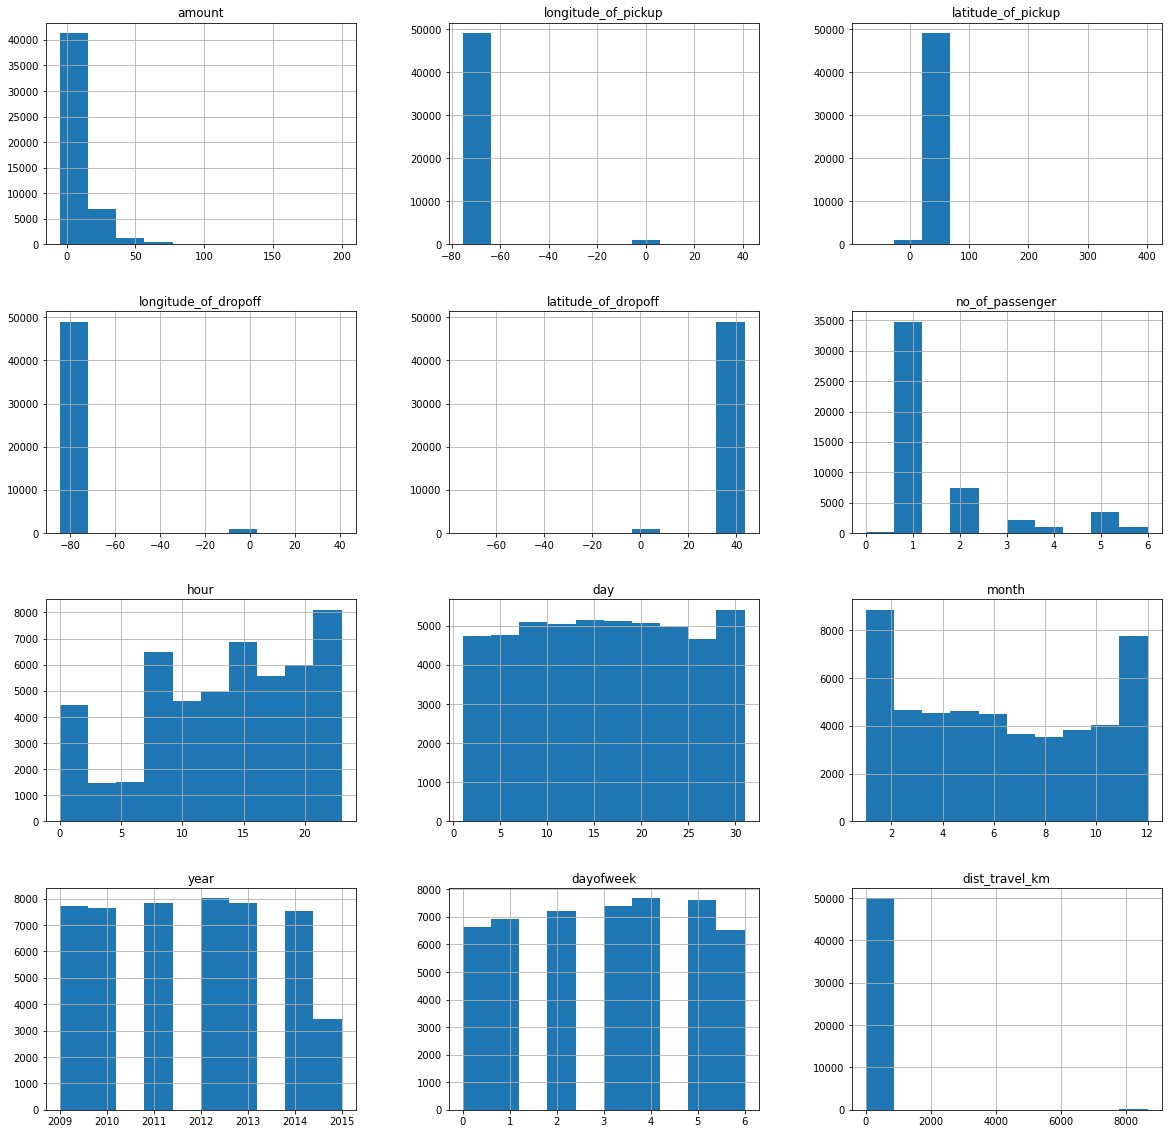

In [ ]:
df.hist(figsize=(20,20))

insights:

Amount data distribution is right skewed.

More no's of booking is done by single passenger.

maximum date_time_pickup done between 2012 to 2014

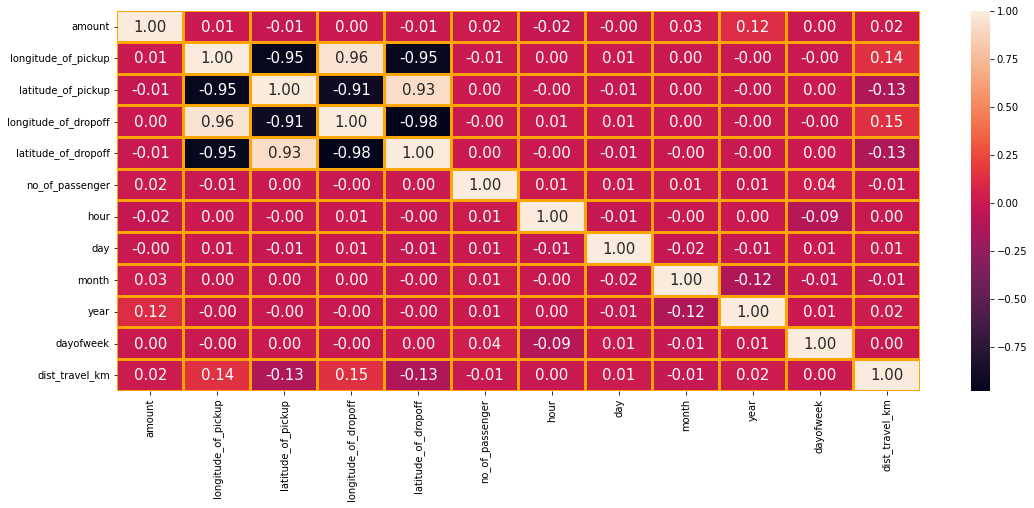

In [ ]:
plt.figure(figsize = (18, 7))
sn.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

insights:

no_of_passenger and amount features are correlated with all the others features

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


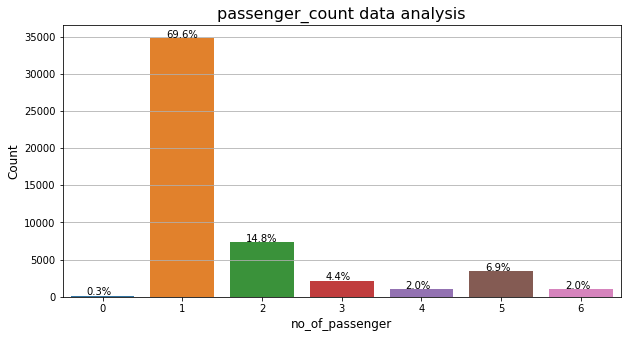

In [ ]:
# Checking data distribution for passenger_count data

fig, ax = plt.subplots(figsize = (10,5))
sn.countplot(df.no_of_passenger, ax = ax)
ax.set_title('passenger_count data analysis', size = 16)
ax.set_xlabel('no_of_passenger', size = 12)
ax.set_ylabel('Count', size = 12)
ax.grid(axis='y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format( (p.get_height() / df.shape[0]) * 100 ), (p.get_x()+0.2, p.get_height()+55))
plt.show()

insights:

Almost 70percent booking done from single passengers

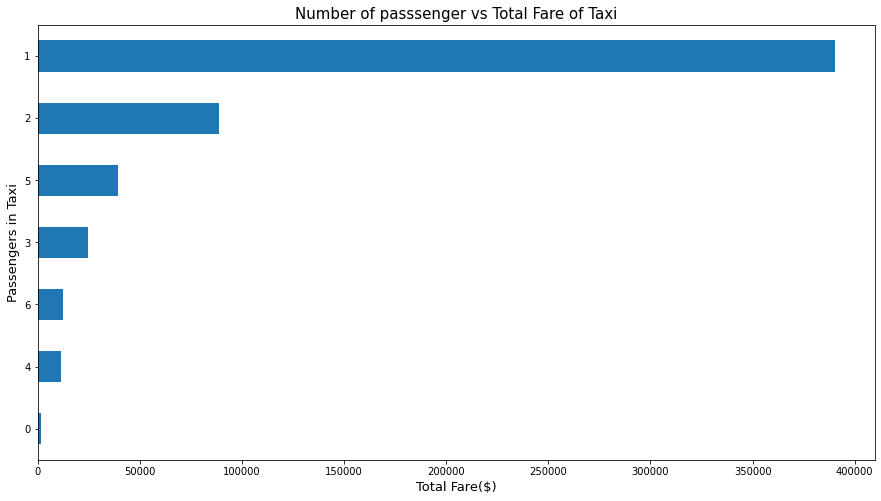

In [ ]:
plt.figure(figsize=(15,8))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

Insights:

As we can see here maximum single passengers total fares is 380000.

2 passengers total fare is 100000 and so on

In [ ]:
df=df.drop("unique_id",axis=1)

In [ ]:
df=df.drop("latitude_of_pickup",axis=1)

In [ ]:
df=df.drop("longitude_of_dropoff",axis=1)

In [ ]:
df=df.drop("latitude_of_dropoff",axis=1)

In [ ]:
df=df.drop("no_of_passenger",axis=1)

In [ ]:
df=df.drop("dist_travel_km",axis=1)

In [ ]:
df=df.drop("longitude_of_pickup",axis=1)

In [ ]:
df.isnull().sum()

amount             0
no_of_passenger    0
hour               0
day                0
month              0
year               0
dayofweek          0
dtype: int64

In [ ]:
x=df.drop(["no_of_passenger"], axis=1)

In [ ]:
y= df["no_of_passenger"]

## Training a Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02        62
           1       0.71      0.66      0.68     11532
           2       0.17      0.19      0.17      2398
           3       0.04      0.05      0.05       700
           4       0.03      0.03      0.03       342
           5       0.07      0.08      0.07      1137
           6       0.03      0.03      0.03       329

    accuracy                           0.50     16500
   macro avg       0.15      0.15      0.15     16500
weighted avg       0.53      0.50      0.51     16500



In [ ]:
print(confusion_matrix(y_test,predictions))

[[   1   37    9    4    5    5    1]
 [  48 7615 1811  600  278  934  246]
 [   8 1495  445  129   79  186   56]
 [   2  430  124   37   28   58   21]
 [   2  235   47   14   11   26    7]
 [   2  737  204   61   25   92   16]
 [   1  225   51   16    7   19   10]]


## Training the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

In [ ]:
predictions=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.11      0.02      0.03        62
           1       0.70      0.96      0.81     11532
           2       0.19      0.04      0.06      2398
           3       0.00      0.00      0.00       700
           4       0.08      0.01      0.02       342
           5       0.09      0.01      0.02      1137
           6       0.04      0.00      0.01       329

    accuracy                           0.67     16500
   macro avg       0.17      0.15      0.13     16500
weighted avg       0.52      0.67      0.58     16500



In [ ]:
print(confusion_matrix(y_test,predictions))

[[    1    58     2     0     1     0     0]
 [    5 11031   308    54    16    98    20]
 [    1  2274    87    11    10    11     4]
 [    1   671    21     0     0     7     0]
 [    0   333     5     1     3     0     0]
 [    0  1076    39     6     5    11     0]
 [    1   316     8     0     2     1     1]]


[Text(0.5, 0.875, 'X[5] <= 4.5\ngini = 0.488\nsamples = 33500\nvalue = [103, 23276, 4988, 1483, 674, 2316, 660]'),
 Text(0.25, 0.625, 'X[1] <= 12.5\ngini = 0.463\nsamples = 23979\nvalue = [77, 17153, 3291, 948, 409, 1628, 473]'),
 Text(0.125, 0.375, 'X[1] <= 3.5\ngini = 0.418\nsamples = 9775\nvalue = [35, 7327, 1156, 338, 109, 618, 192]'),
 Text(0.0625, 0.125, 'gini = 0.48\nsamples = 1653\nvalue = [2, 1157, 251, 80, 30, 110, 23]'),
 Text(0.1875, 0.125, 'gini = 0.405\nsamples = 8122\nvalue = [33, 6170, 905, 258, 79, 508, 169]'),
 Text(0.375, 0.375, 'X[4] <= 2011.5\ngini = 0.491\nsamples = 14204\nvalue = [42, 9826, 2135, 610, 300, 1010, 281]'),
 Text(0.3125, 0.125, 'gini = 0.504\nsamples = 6708\nvalue = [22, 4553, 1086, 309, 166, 537, 35]'),
 Text(0.4375, 0.125, 'gini = 0.479\nsamples = 7496\nvalue = [20, 5273, 1049, 301, 134, 473, 246]'),
 Text(0.75, 0.625, 'X[1] <= 3.5\ngini = 0.545\nsamples = 9521\nvalue = [26, 6123, 1697, 535, 265, 688, 187]'),
 Text(0.625, 0.375, 'X[1] <= 2.5\ngini 

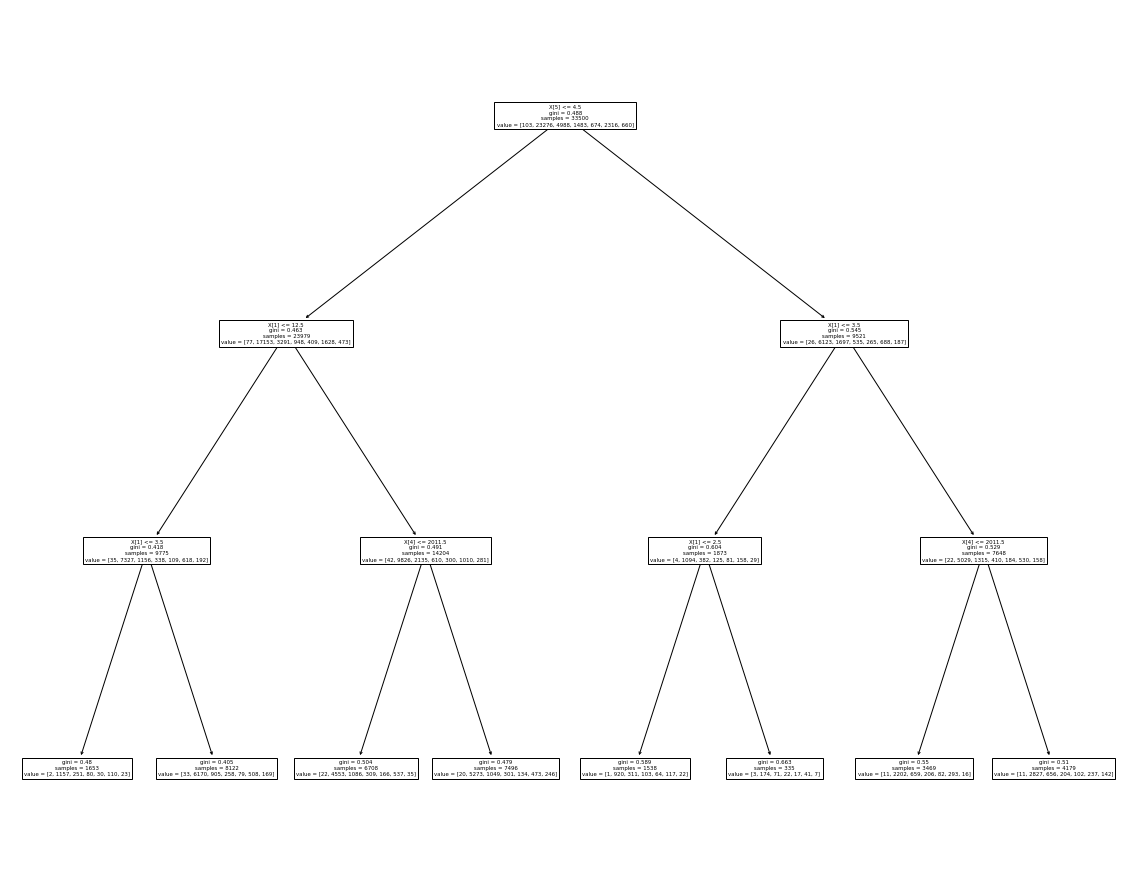

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(20,16))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

[Text(0.5, 0.875, 'X[4] <= 2011.5\nentropy = 1.49\nsamples = 33500\nvalue = [103, 23276, 4988, 1483, 674, 2316, 660]'),
 Text(0.25, 0.625, 'X[4] <= 2010.5\nentropy = 1.494\nsamples = 15563\nvalue = [61, 10604, 2487, 728, 341, 1253, 89]'),
 Text(0.125, 0.375, 'X[5] <= 3.5\nentropy = 1.45\nsamples = 10253\nvalue = [0, 7034, 1639, 492, 214, 830, 44]'),
 Text(0.0625, 0.125, 'entropy = 1.352\nsamples = 5796\nvalue = [0, 4158, 819, 240, 104, 457, 18]'),
 Text(0.1875, 0.125, 'entropy = 1.566\nsamples = 4457\nvalue = [0, 2876, 820, 252, 110, 373, 26]'),
 Text(0.375, 0.375, 'X[5] <= 4.5\nentropy = 1.559\nsamples = 5310\nvalue = [61, 3570, 848, 236, 127, 423, 45]'),
 Text(0.3125, 0.125, 'entropy = 1.494\nsamples = 3838\nvalue = [48, 2674, 550, 148, 79, 301, 38]'),
 Text(0.4375, 0.125, 'entropy = 1.701\nsamples = 1472\nvalue = [13, 896, 298, 88, 48, 122, 7]'),
 Text(0.75, 0.625, 'X[4] <= 2012.5\nentropy = 1.47\nsamples = 17937\nvalue = [42, 12672, 2501, 755, 333, 1063, 571]'),
 Text(0.625, 0.375,

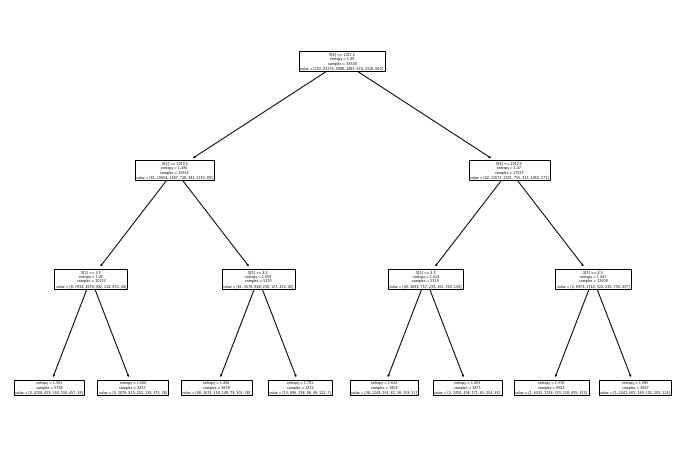

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train,y_train))